# k-최근접 이웃 (kNN : k-Nearest Neighbors)

- #Supervised
- #지도학습

|         장점         |       단점      |
|:--------------------:|:---------------:|
| 정확도 | 메모리와 계산량 |
| 선입견과 가정이 없음 | 기존 훈련용 데이터에 의존 |
| 이상치에 영향이 적음 | |
| 훈련과정이 불필요함| |


## 거리 측정을 기준으로 분류

k-최근접이웃 분류방법은 기존에 훈련용 데이터 집합과 항목(labels)을 새로운 데이터와 비교하여 가장 근접한 항목으로 분류하는 방법이다. 가장 근접한 항목을 k개수만큼 선정한 뒤 다수결을 통해 분류항목을 결정한다.

## 일반적 알고리즘

- 새로운 데이터 X에 대해 kNN 알고리즘을 사용한 분류방법은 다음과 같이 나타낼수 있다.

```
point For every train_dataset:
    distance = ||new_point - point||
    find k items of lowest distance
    select label of majority class from k items
    return prediction
```

In [1]:
%matplotlib inline
%load_ext autoreload 
%autoreload 2
from importlib import reload

# Import Assisting Packages
import import_ipynb
import DataGenerator # import bi_property

# Import Standard Packages
import math

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import numpy as np
import pandas as pd
import operator

np.random.seed(10)

ModuleNotFoundError: No module named 'import_ipynb'

## 기본예제 1

- 기존항목(labels) : 3개의 라벨 (0~2)
- 데이터(properties) : (x1, x2)

![](images/simple_algorithm.svg)

Category 0 -> mean: [9, 8] , variance: 14 , count: 39
Category 1 -> mean: [18, 10] , variance: 13 , count: 34
Category 2 -> mean: [21, 17] , variance: 14 , count: 35


/Users/skim0119/Desktop/Project/MachineLearning_Notes/venv/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


,x1,x2,category
0,16.235032,9.964592,1
1,25.365384,15.431085,2
2,13.982340,10.676329,0
3,11.470360,6.687158,0
4,9.016057,7.346706,0


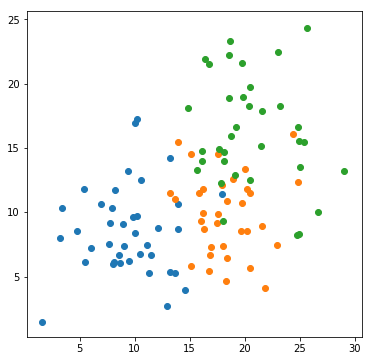

In [43]:
# Prepare Dataset
n_categories = 3
df = DataGenerator.bi_property_dataset(n_categories)
df.head()

In [44]:
# 분류기 생성
def knn_classifier(new_x, k, dataset=df.values[:,:-1], labels=df.values[:,-1]):
    # 새로운 점부터 다른 지점까지에 거리 계산 (유클리드 거리계산법)
    n_dataset = dataset.shape[0]
    dist = ((np.tile(new_x, (n_dataset,1)) - dataset)**2).sum(axis=1)**(0.5)
    # 가장 짧은 거리 k개수 선정
    shortest_arg = dist.argsort()[:k]
    count={}          
    for i in shortest_arg:
        label = int(labels[i])
        count[label] = 1 + count.get(label,0) # initialize and increment at the same time
    major_label = sorted(count.items(), key=operator.itemgetter(1), reverse=True)[0][0] # sort by reverse
    return major_label
    # 선정된 라벨을 이용해 다수결로 최종결정

### 시각화 : 
데이터는 x1과 x2에 의해 분류될수 있으며, 그래프상 임의에 점을 주어졌을때에 분류 결과를 보여줌.

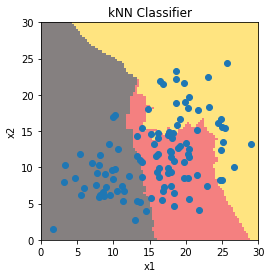

In [56]:
# 분류기 시각화
# Draw Original Data
k = 5
x1 = df.values[:,0]
x2 = df.values[:,1]
plt.scatter(x1,x2)
# Set the color map to match the number of category
hot = plt.get_cmap('hot')
cNorm  = colors.Normalize(vmin=0, vmax=n_categories)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

# Draw result
linex1 = np.linspace(min(x1),max(x1), num=100)
linex2 = np.linspace(min(x2),max(x2), num=100)
field = [[scalarMap.to_rgba(knn_classifier([x1,x2], k))
          for x1 in linex1] for x2 in linex2]

plt.imshow(field, origin='lower', extent=(0,30,0,30), alpha=0.5)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('kNN Classifier')
plt.show()